# Exploration of data

In [2]:
%matplotlib inline

from waveletAnalysis import waveletAnalysis as wave
import timecourseAnalysis as tca
from hdf5manager import hdf5manager as h5
from matplotlib import pyplot as plt
from wholeBrainPCA import *
import scipy
import math
from scipy import ndimage
from skimage.measure import label, regionprops
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib
import os

# plt.rc("font", size=14)
# sns.set(style="white")
# sns.set(style="whitegrid", color_codes=True)

# import plotly
# plotly.tools.set_credentials_file(username='brmullen', api_key='w9zNJSqbIzgDUYE9ET7R')

Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [3]:
#Open file
path = '/Users/shreyamantripragada/Documents/'
file = '170721_07_c2_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   angs.stdev   angs.mean  mov.mean  mov.std  mov.mode  mov.range  \
0   99.903343  173.721863     0.314    2.895         1     43.899   
1         NaN         NaN     0.000    0.000     17777      0.000   
2         NaN         NaN     0.000    0.000     17777      0.000   
3         NaN         NaN     0.000    0.000     17777      0.000   
4         NaN         NaN     0.000    0.000     17777      0.000   

   mov.eventrest  mov.maxeventval  mov.surfarea  mov.totalmag  ...  \
0              1            0.314           620      4646.952  ...   
1              0            0.000             0         0.000  ...   
2              0            0.000             0         0.000  ...   
3              0            0.000             0         0.000  ...   
4              0            0.000             0         0.000  ...   

   move.timefromevent  mov.numlocmax  brain.data  brain.eventrest  \
0                   0            189      -0.038                0   
1                   1     

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """


In [4]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

data -= data.min()
data /= data.max()
data['mov.mean'] = data['mov.mean']
data = data.fillna(value=0)


#print(data.head())

In [5]:
#notnoise_index = data.loc[data['standard_deviation'] < 1].index

# def sepHist(data, artifact, noise):
    
#     noisedf = data[classify == 2]
#     artifactdf = data[classify == 1]
#     sigdf = data[classify == 0]
#     return noisedf, artifactdf, sigdf

# noisedf, artifactdf, sigdf = sepHist(data, artifact, noise)
col_list = data.columns.tolist()
print(col_list)

#print(data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index)
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 2
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 3
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 0
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 1


# for col in col_list:
#     print(col)

#     fig , ax1 = plt.subplots()
#     ax1.hist(data.loc[body_rest_brain_active, col], bins = 25, alpha = 0.5, label ='mo', color = 'g')
#     ax1.grid(False)         
#     ax1.set_xlabel('Values')
#     ax1.set_ylabel('# of instances', color = 'green')

#     ax2 = ax1.twinx()
#     ax2.hist(data.loc[body_rest_brain_rest, col], bins = 25, alpha = 0.5, label ='body_rest_brain_rest', color = 'b')
#     ax2.set_ylabel('# of instances', color = 'blue')
#     ax2.grid(False)
    
#     ax3 = ax1.twinx()
#     ax3.hist(data.loc[body_active_brain_active], bins = 25, alpha = 0.5, label = 'body_active_brain_active', color = 'o')
#     ax3.set_ylabel('# of instances', color = 'orange')
#     ax3.grid(False)
    
#     ax4 = ax1.twinx()
#     ax4.hist(data.loc[body_active_brain_rest], bins = 25, alpha = 0.5, label = 'body_active_brain_rest', color = 'k')
#     ax4.set_ylable('# of instances', color = 'black')
#     ax4.grid(False)
    
# #     ax2.hist(noisedf[col].dropna(), bins = 25, alpha = 0.5, label ='noise', color = 'r')
# #     ax2.set_xlabel('Values')
# #     ax2.set_ylabel('# of instances', color = 'red')
    
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')
    
#     plt.show()

    
    
#     fig = plt.figure()
#     x = data.loc[(data[col]) & (noise[:X_reduced_tsne.shape[0]] == 0)]
#     y = data.iloc[[noise[:X_reduced_tsne.shape[0]] == 1],col]
#     ax = fig.add_subplot(111)
#     _ = ax.hist(x)
#     _ = ax.hist(y, color ='red', alpha=0.3)
    
# #     data[col,np.where(noise[:X_reduced_tsne.shape[0]] == 0)]
# #     d
#     plt.show()

# for col in col_list:
#     print(col)
#     data3[col].apply(np.log2).hist(by = noise[:X_reduced_tsne.shape[0]])
#     plt.show()


['angs.stdev', 'angs.mean', 'mov.mean', 'mov.std', 'mov.mode', 'mov.range', 'mov.eventrest', 'mov.maxeventval', 'mov.surfarea', 'mov.totalmag', 'mov.firstder', 'mov.secder', 'mov.stdx', 'mov.stdy', 'mov.diffxystd', 'mov.diffmaxevents', 'mov.percent', 'mov.percenterror', 'mov.timetoevent', 'move.timefromevent', 'mov.numlocmax', 'brain.data', 'brain.eventrest', 'brain.rangemaxmin', 'brain.firstder', 'brain.secondder', 'diff.brainmov', 'diff.brainmovfirstder', 'diff.brainmovsecder']


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


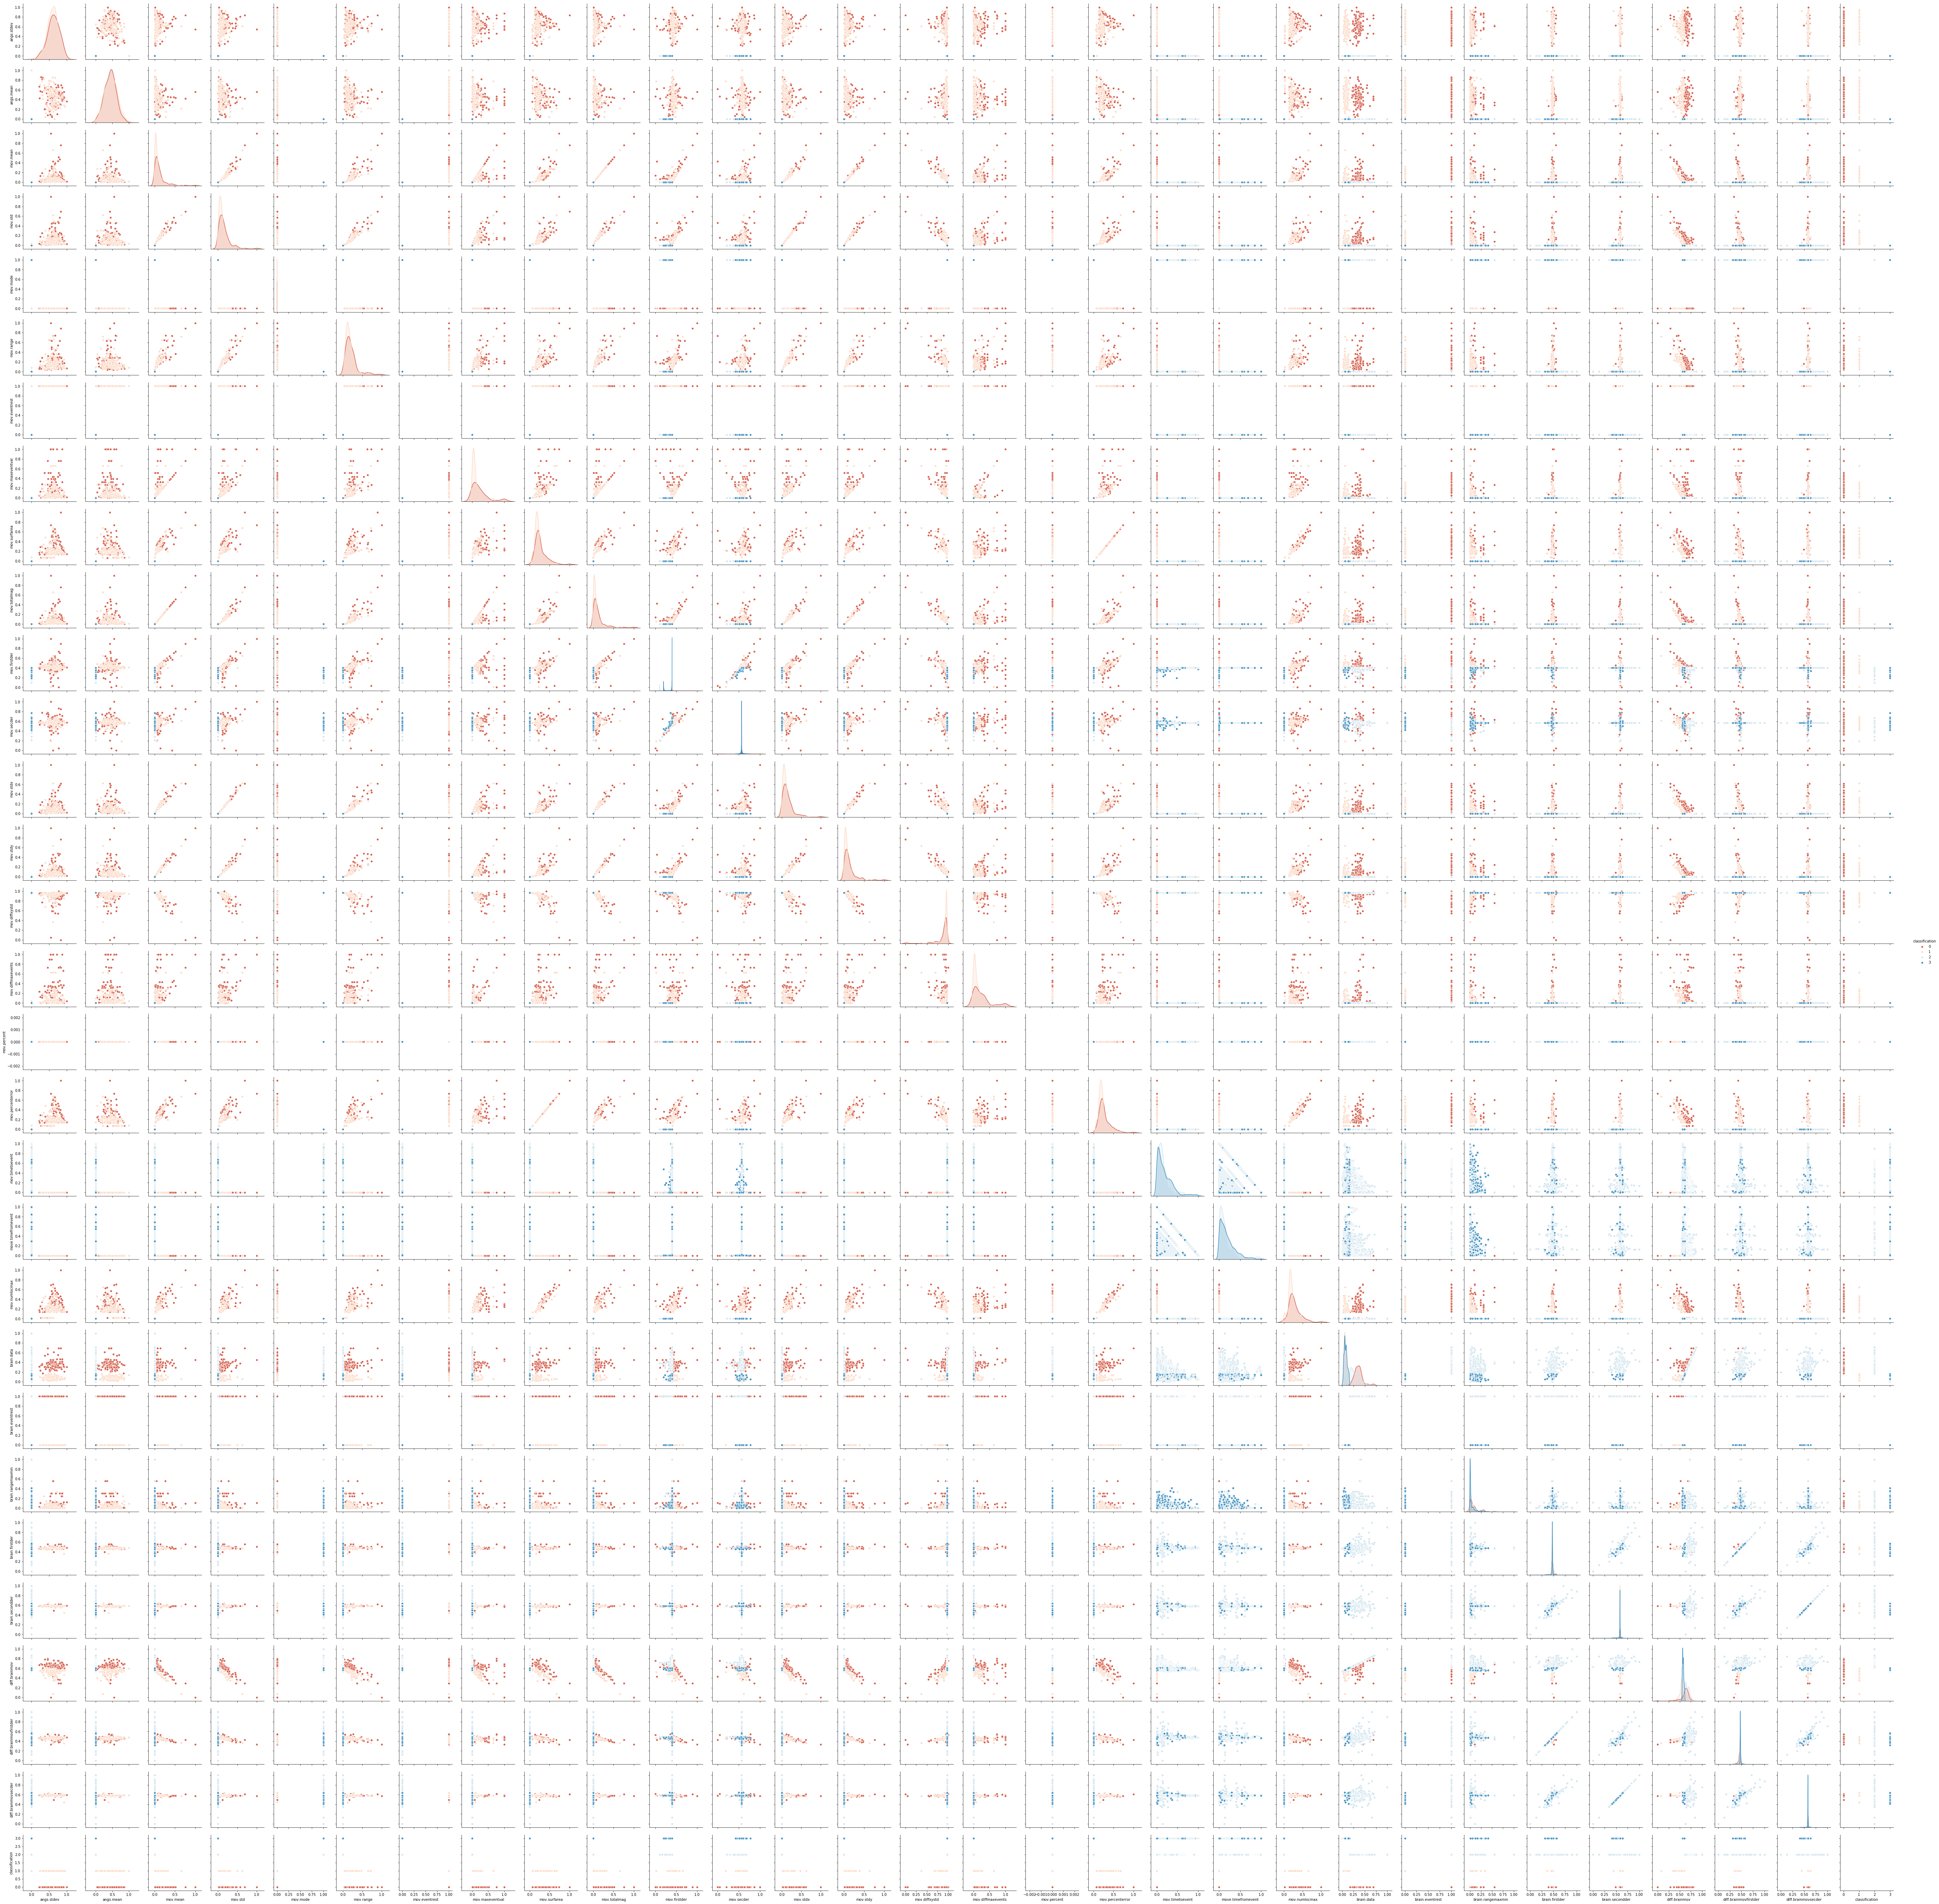

In [6]:
sns.pairplot(data, 
            diag_kind="kde",
            markers= ["o", "o", "o", "o"], 
            hue_order = [0, 1, 2, 3], hue='classification', palette = "RdBu")
plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')

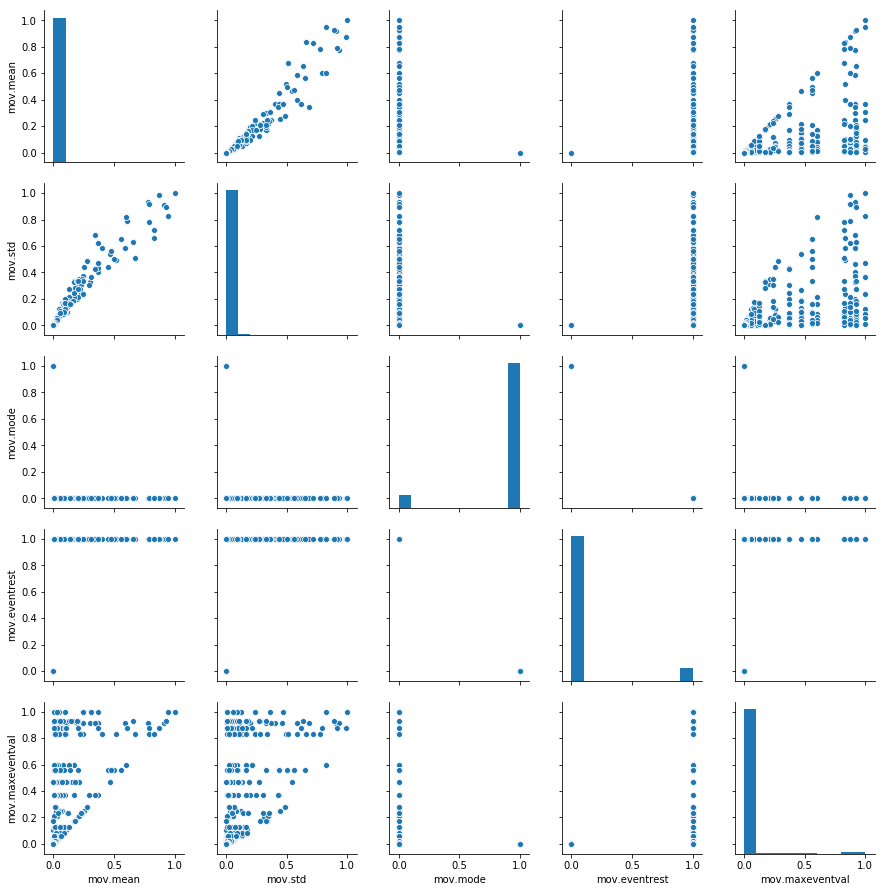

In [16]:
sns.pairplot(data.fillna(value=0)[['mov.mean', 'mov.std', 'mov.mode', 'mov.eventrest', 'mov.maxeventval']])                                 
                    

In [ ]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

#datacopy = data.drop('age', axis =1).copy()
data -= data.min()
data /= data.max()
data = data.fillna(value=0)

In [ ]:
# Both temporal and spatial metrics visualize  
sns.pairplot(data, 
             diag_kind="kde")

plt.savefig('/Users/shreyamantripragada/Documents/metrics_pairplot.png')
plt.show()

In [ ]:
print(sns.__version__)

In [ ]:
plt.imshow(data.corr().values, aspect = "auto", cmap = "seismic")
plt.colorbar()

# Clustering Data

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = pd.DataFrame()
#iris = data

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

Automatically created module for IPython interactive environment


AttributeError: 'DataFrame' object has no attribute 'data'

## t-SNE Classification